In [2]:
import pdb
import numpy as np
import metpy.constants as const
from metpy.units import units as u
import matplotlib.pyplot as plt
import matplotlib as mpl

# ---------- matplotlib settings

mpl.rcParams.update(mpl.rcParamsDefault)

SMALL_SIZE = 9
MEDIUM_SIZE = 11
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

In [3]:
Tmax = 315 * u.K
dTy = 60 * u.K
sb = 5.670374419e-8 * u.W/(u.m**2 * u.K**4)
Re = const.Re
eps = 1 # emissivity

lat = np.linspace(-np.pi/2, np.pi/2, 1000)
latd = lat * 180/np.pi
Teq = (Tmax - dTy*np.sin(lat)**2)

Ilw = eps * sb * Teq**4

integ_lw = eps * sb * 4*np.pi * Re**2 * (7736342625*u.K**4)

S = integ_lw / (np.pi*Re)**2
Isw = S * np.cos(lat)

integ_sw = (np.pi*Re)**2 * S

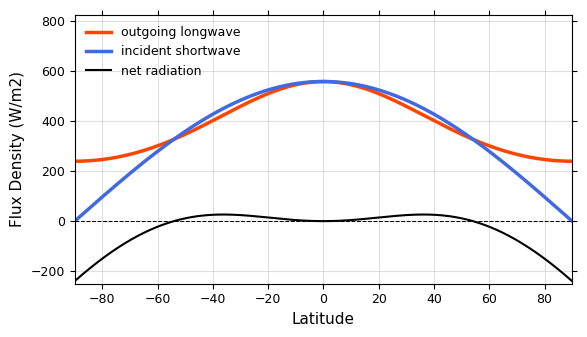

In [9]:
# -------- heating balance fig

fig = plt.figure(figsize=(6, 3.5))
ax = fig.add_subplot(111)
ax.plot(latd, Ilw, '-', color='orangered', lw=2.5, label='outgoing longwave')
ax.plot(latd, Isw, '-', color='royalblue', lw=2.5, label='incident shortwave')
ax.plot(latd, Isw - Ilw, '-k', lw=1.5, label='net radiation')
ax.plot([-90, 90], [0, 0], '--k', lw=0.75)
ax.set_xlim([-90, 90])
ax.grid(alpha=0.4)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.legend(loc='upper left', frameon=False)
ax.set_xlabel('Latitude')
ax.set_ylabel('Flux Density (W/m2)')
ax.set_ylim([-250, 825])

plt.tight_layout()
plt.savefig('figs/HSW_toa.pdf', dpi=300)
plt.show()